# Task A: Data Preprocessing

## 1. Preprocess the label file of MRI dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# Read label (.csv file) of dataset.
label_csv = pd.read_csv('.\dataset\label.csv')

# Print basic information of label, notice that it contains 4 classes based on tumor type. 
print(label_csv.info(), '\n')
print(label_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3000 non-null   object
 1   label      3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
None 

        file_name             label
0  IMAGE_0000.jpg  meningioma_tumor
1  IMAGE_0001.jpg          no_tumor
2  IMAGE_0002.jpg  meningioma_tumor
3  IMAGE_0003.jpg      glioma_tumor
4  IMAGE_0004.jpg  meningioma_tumor


In [3]:
# For binary task classification, we simply use "0" and "1" to indicate and identify whether there is a tumor in the MRI images. 
label_csv['new'] = 1
label_csv['new'][label_csv['label']=='no_tumor'] = 0

# Check result.
label_csv.head()

C:\Users\16967\.conda\envs\AMLS_Lab\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,file_name,label,new
0,IMAGE_0000.jpg,meningioma_tumor,1
1,IMAGE_0001.jpg,no_tumor,0
2,IMAGE_0002.jpg,meningioma_tumor,1
3,IMAGE_0003.jpg,glioma_tumor,1
4,IMAGE_0004.jpg,meningioma_tumor,1


In [4]:
# Transfer label into array dataformat.
label_TaskA = np.array(label_csv['new']).astype('uint8')

# Check result.
label_TaskA.shape, label_TaskA.dtype

((3000,), dtype('uint8'))

## 2. Preprocess MRI images

In [5]:
# Import necessary libraries
import cv2
from glob import glob

In [6]:
# Read 3000 512x512 pixel gray-scale MRI images
images = [cv2.imread(image, cv2.IMREAD_GRAYSCALE) 
          for image in glob('dataset/image/*.jpg')]


### Uncomment the following code to check MRI image.
# cv2.imshow('MRI Image Test', images[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
# Normalize pictures by using Maximum and minimum normalization.
images_normlize = [cv2.normalize(images[i], None, alpha=0,beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
                   for i in range(0, len(images))]


### Uncomment the following code to check normalized MRI image.
# cv2.imshow('Normalized MRI Image Test', images_normlize[1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
# Median filter is used to remove noise from the MRI images. 
images_blur = [cv2.medianBlur(images_normlize[i], 5)
               for i in range(0, len(images))]

### Uncomment the following code to check filtered MRI image.
# cv2.imshow('MRI Image After Median Filter Test', images_blur[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [14]:
# Transfer images into array dataformat.
images_TaskA = np.array(images_blur)

# Print image infotmation
print('{} images with {}x{} pixel. \n'.format(images_TaskA.shape[0], 
                                              images_TaskA.shape[1], 
                                              images_TaskA.shape[2]))

# Vectorize images. 
images_TaskA = images_TaskA.reshape((3000, 512*512))

# Print vectorized image infotmation
print('After vectorization')
print('{} vectorized images with {}(512^2) pixel.'.format(images_TaskA.shape[0], 
                                                          images_TaskA.shape[1]))

3000 images with 512x512 pixel. 

After vectorization
3000 vectorized images with 262144(512^2) pixel.


## 3. Data dimensionality reduction and denoising by using PCA

### A simple test by using SVM

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [16]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(images_TaskA,label_TaskA, 
                                                    test_size=0.3, random_state=0)

# Check result.
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((2100, 262144), (2100,), (900, 262144), (900,))

In [17]:
# Call the SVC() model from sklearn and fit the model to the training data.
svm_test = SVC()
svm_test.fit(X_train, y_train)

SVC()

In [18]:
# Get predictions from the model.
pred_test = svm_test.predict(X_test)

# Check the accuracy score.
print('Accuracy score:', accuracy_score(y_test,pred_test))

Accuracy score: 0.9244444444444444


### PCA

In [19]:
# Import necessary libraries
from sklearn.decomposition import PCA

In [20]:
# Call the PCA() model from sklearn and fit the model to the training data.
# In this example, we want to oberserve the top 500 principal components of data.
pca_test = PCA(n_components=500)
pca_test.fit(images_TaskA)

PCA(n_components=500)

In [22]:
x = pca_test.explained_variance_ratio_
x_cum = x.cumsum()

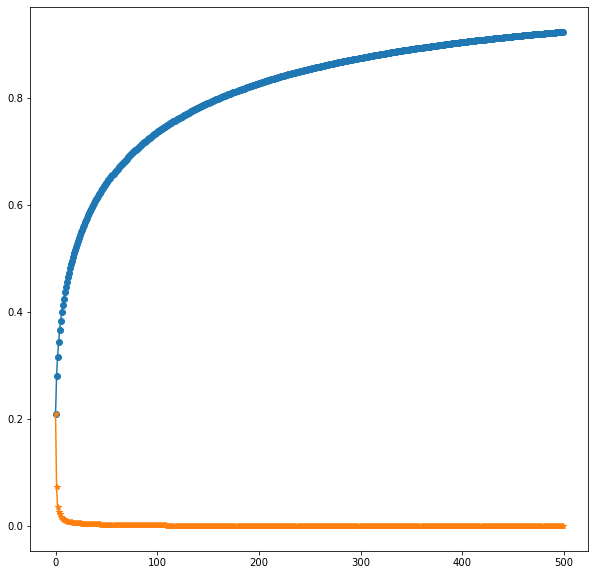

In [23]:
import matplotlib.pyplot as plt

k = 500

plt.figure(figsize=(10,10))
plt.plot(x_cum[:k], 'o-')
plt.plot(x[:k], '*-')


# for i in 

In [ ]:
fig, axes = plt.subplots(2,1 figsize = (12,3))

# default grid appearance
axes[0].plot(x_cum[:k], 'o-', lw=2)
axes[0].grid()

# custom grid appearance
axes[1].plot(x[:k], '*-', lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

In [ ]:
# Call the PCA() model from sklearn and fit the model to the training data.
# Notice that
pca_TaskA = PCA(n_components=200)
images_PCA = pca_TaskA.fit_transform(images_TaskA)

In [ ]:
# Split data into a training set and a test set.
# Notice that
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(images_PCA,label_TaskA, 
                                                                    test_size=0.3, random_state=0)

# Check result.
X_train_PCA.shape, y_train_PCA.shape, X_test_PCA.shape, y_test_PCA.shape 

# Call the SVC() model from sklearn and fit the model to the training data.
svm_PCA = SVC()
svm_PCA.fit(X_train_PCA, y_train_PCA)

# Get predictions from the model.
pred_PCA = svm_model.predict(X_test_PCA)

# Check the accuracy score.
print('Accuracy score:', accuracy_score(y_test_PCA,pred_PCA))

## 4. Save all preprocessed data

In [86]:
import pickle